#### Autocorrelation Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
INITIAL_DATE = "2003-06-26"

futures_ir = pd.read_excel("./data/future_interest_rates/future_interest_rates.xlsx", index_col="Date")
futures_ir.index = pd.to_datetime(futures_ir.index)
futures_ir = futures_ir[futures_ir.index >= INITIAL_DATE]

futures_ir.sort_index(inplace=True)
futures_ir_diff = futures_ir.diff().dropna()
vertix_names = futures_ir_diff.columns.to_list()


In [3]:
def calc_vol(returns: pd.Series) -> float:
    vol = returns.std()
    return vol

mw_volatility_5 = futures_ir_diff.rolling(5).apply(calc_vol)
mw_volatility_5 = mw_volatility_5.dropna()

mw_volatility_5 = np.log(mw_volatility_5)

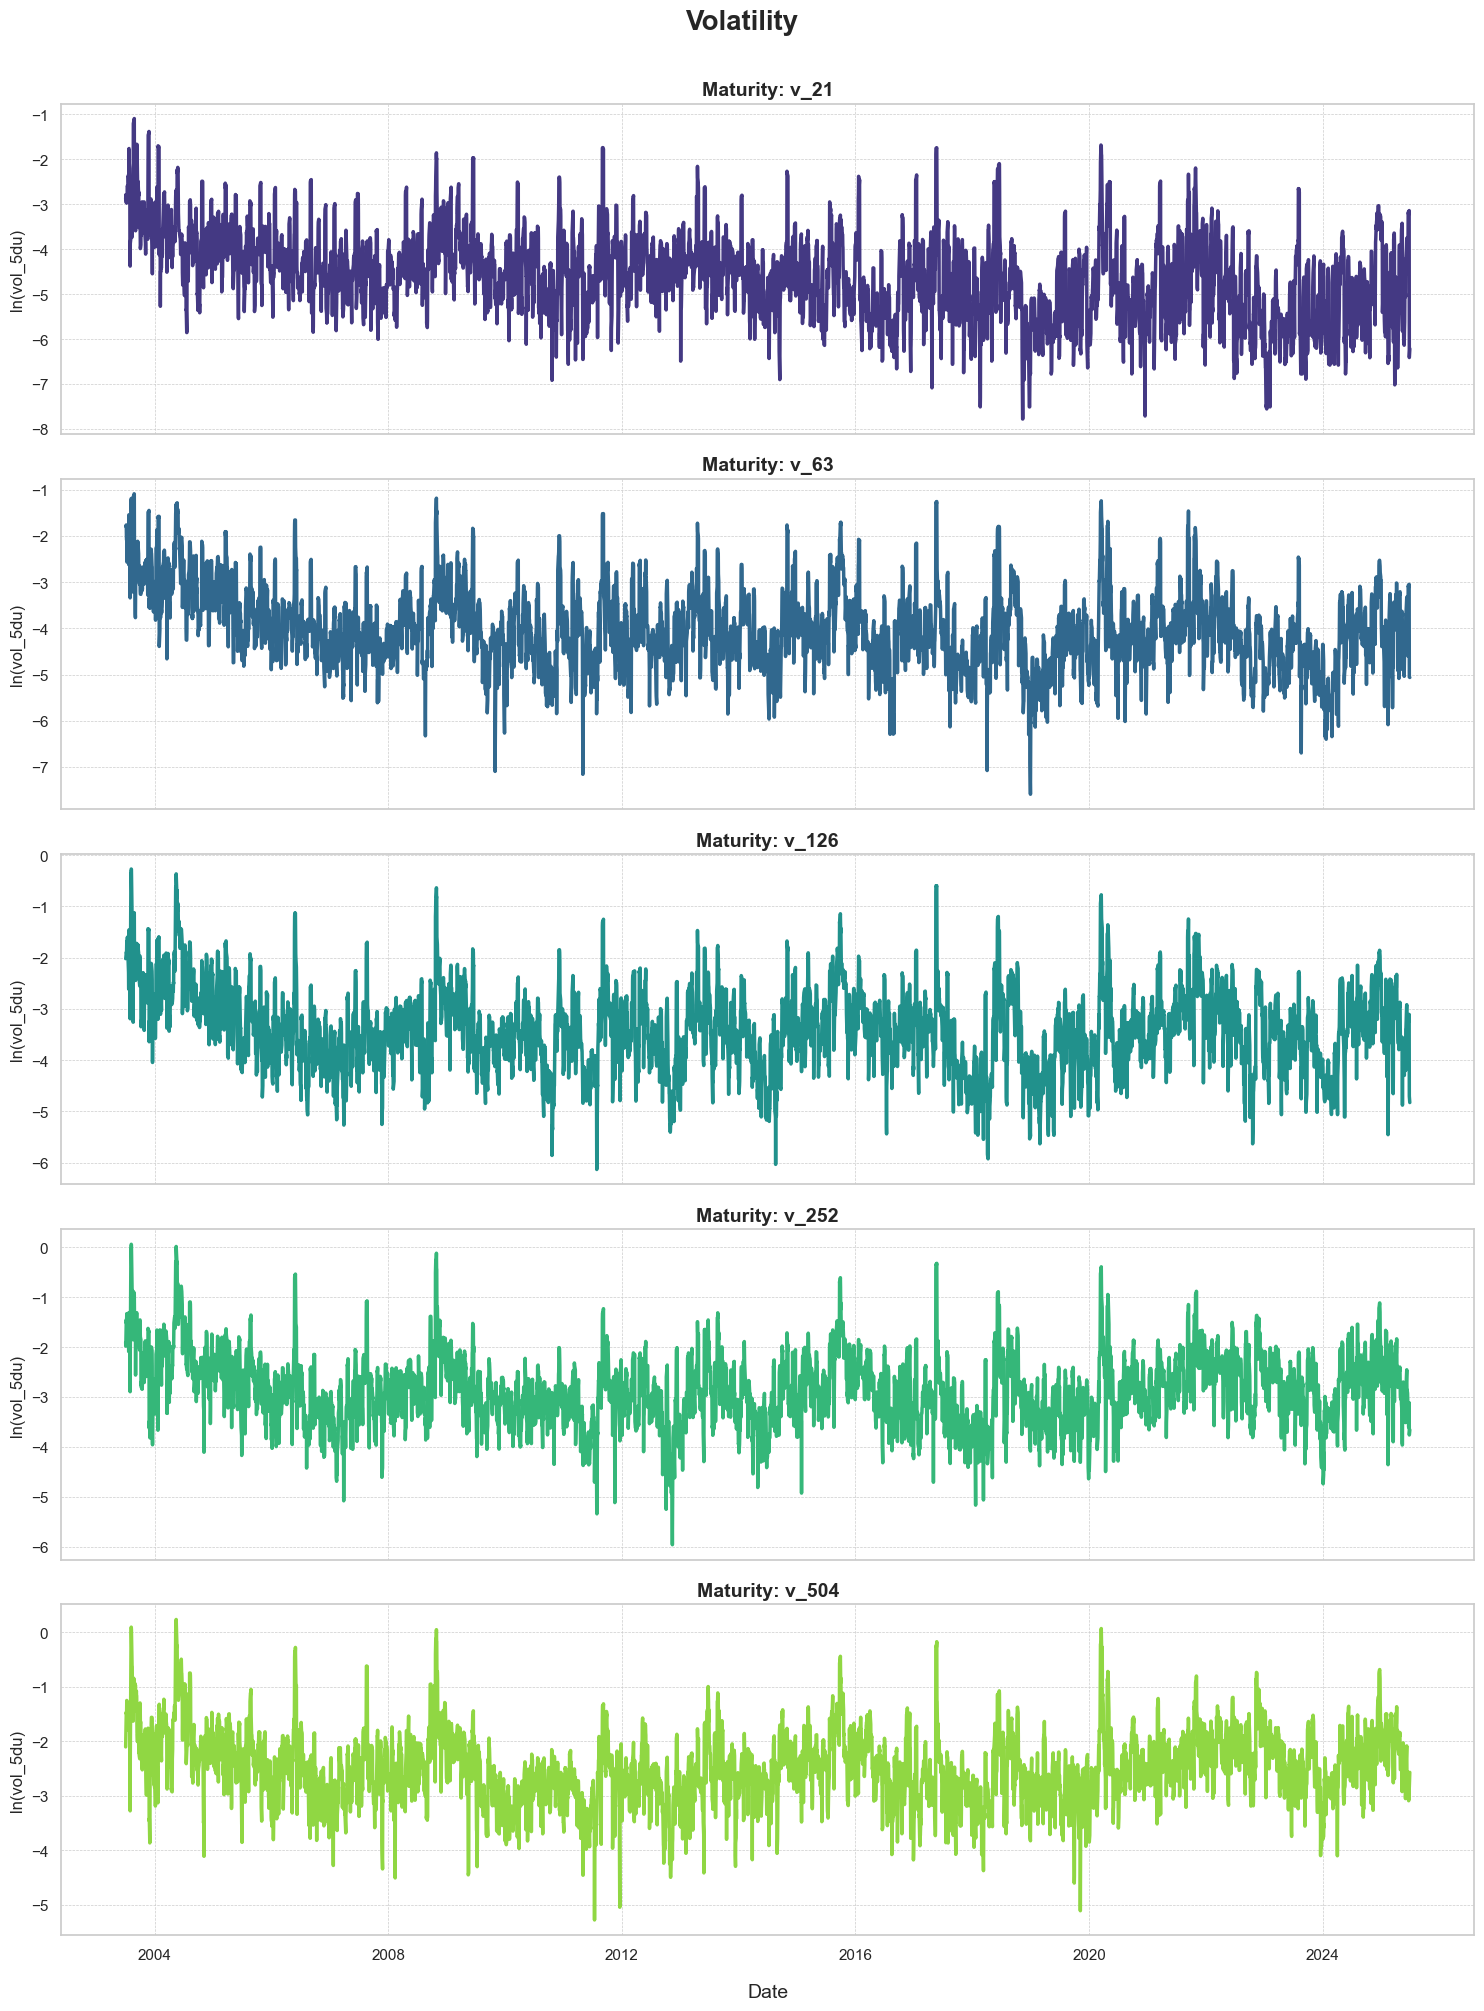

In [4]:
sns.set_theme(style="whitegrid")

columns = mw_volatility_5.columns
num_plots = len(columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(15, 4 * num_plots), sharex=True)

palette = sns.color_palette("viridis", n_colors=num_plots)

for ax, col, color in zip(axes, columns, palette):
    sns.lineplot(data=mw_volatility_5[col], ax=ax, color=color, linewidth=2.5)
    
    ax.set_title(f"Maturity: {col}", fontsize=14, weight="bold")
    ax.set_ylabel("ln(vol_5du)", fontsize=12)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

fig.suptitle("Volatility", fontsize=20, weight="bold", y=1.005)
plt.xlabel("Date", fontsize=14, labelpad=15)
plt.tight_layout()

plt.show()

### ACF AND PACF FOR VOLATILITY

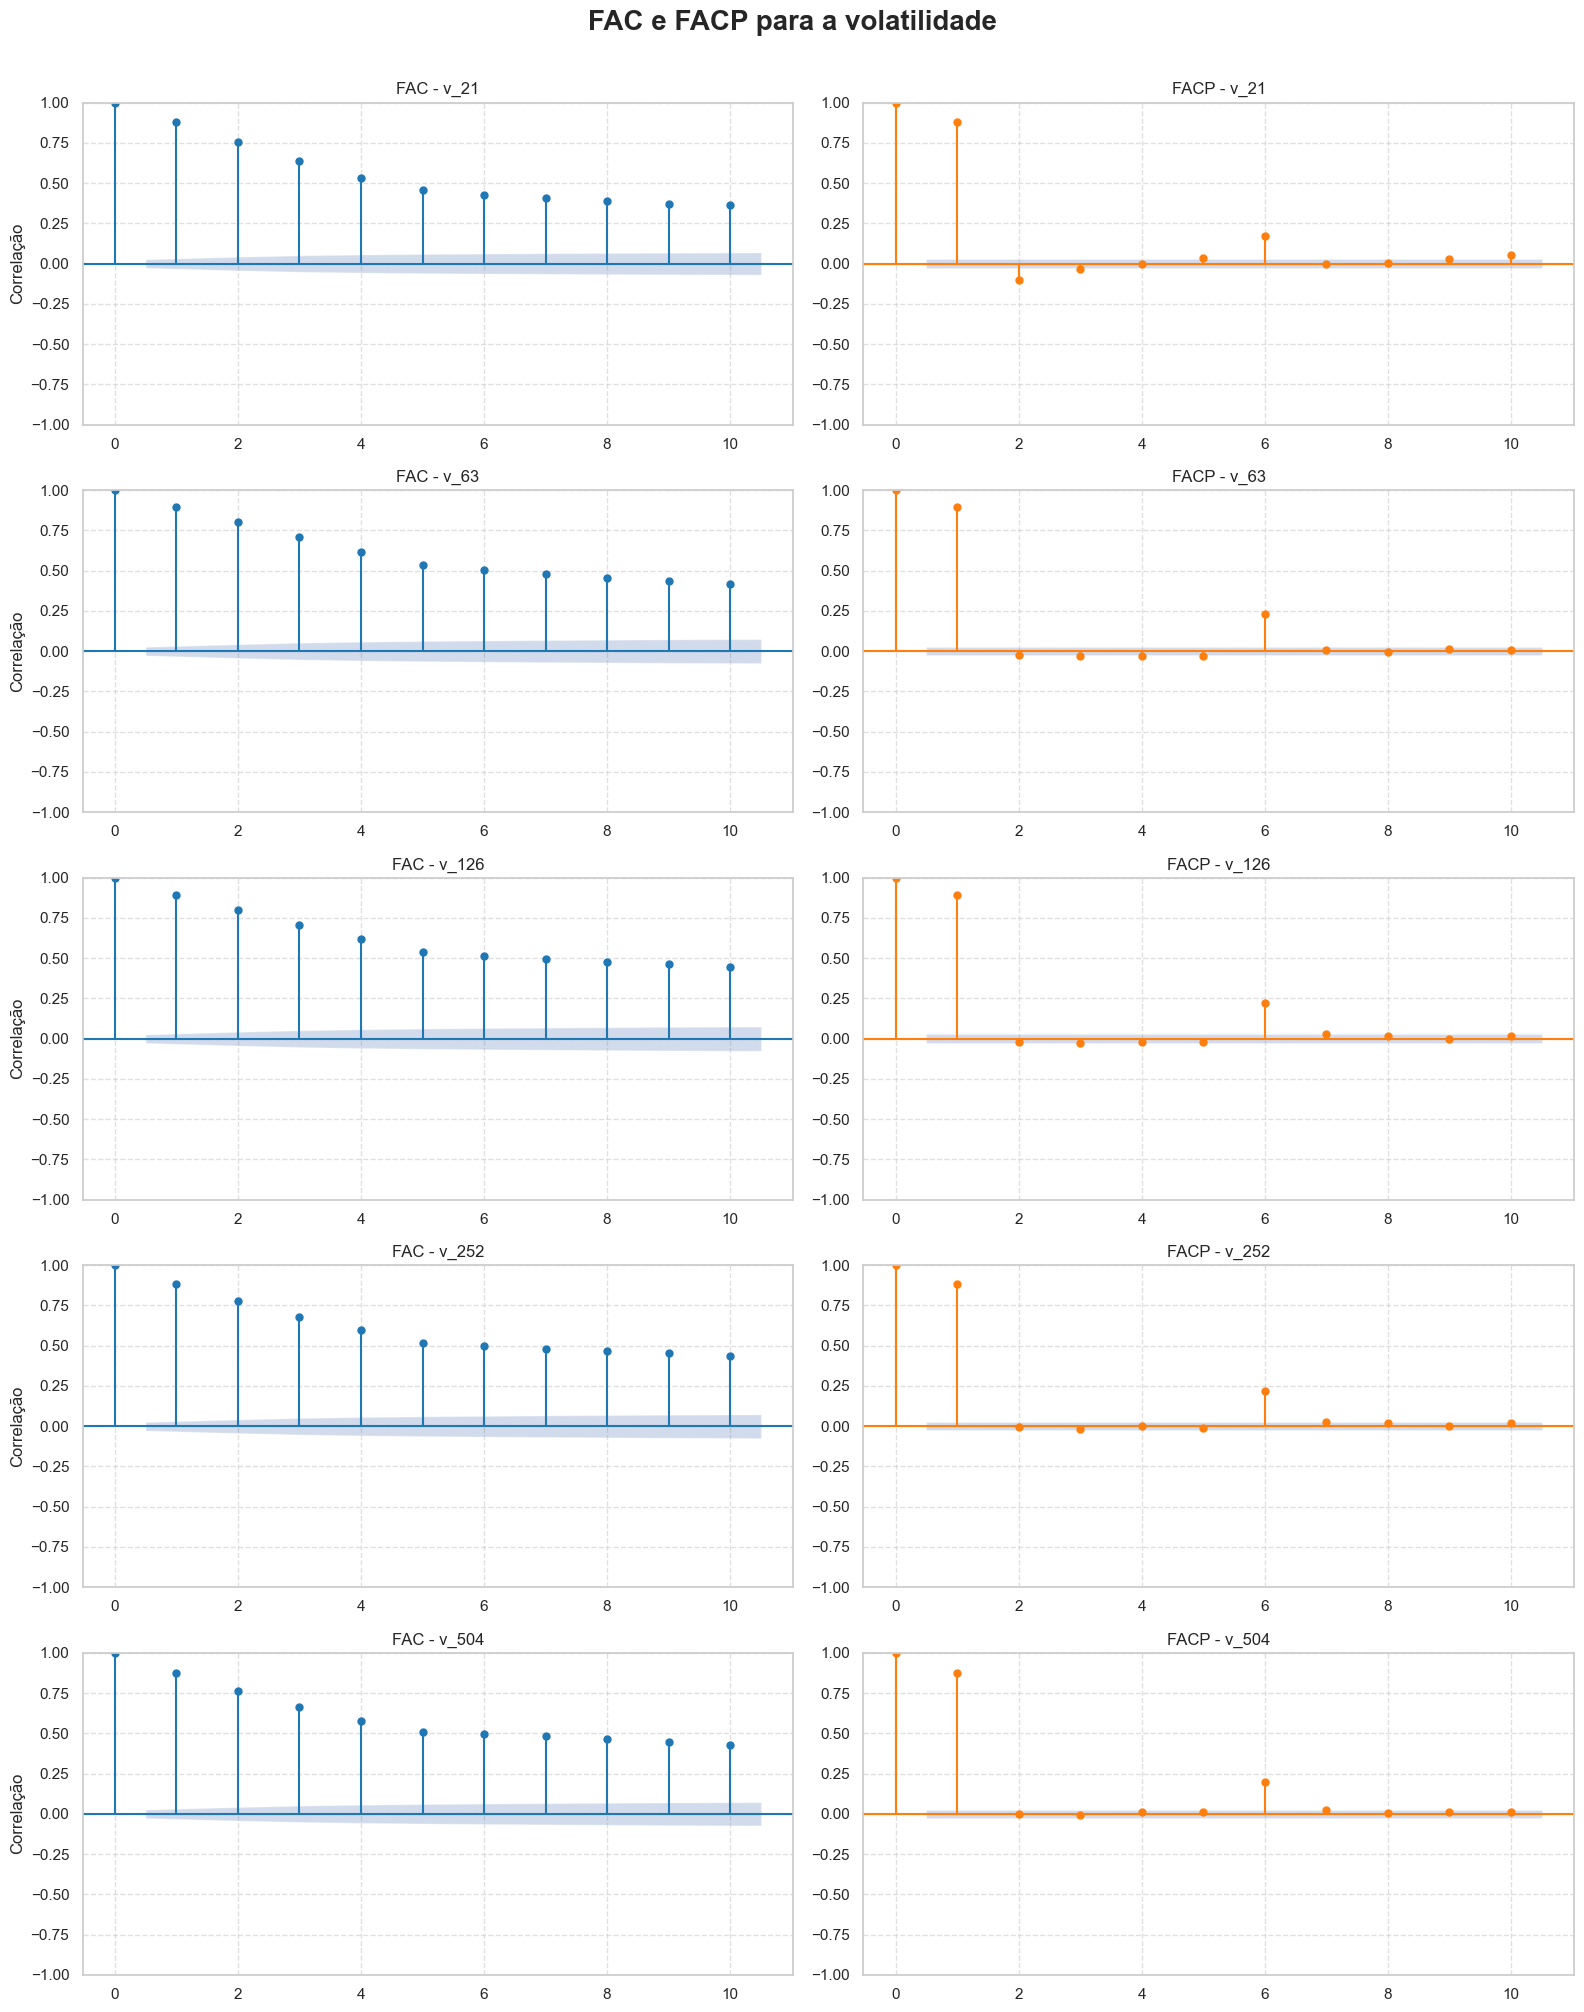

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_theme(style="whitegrid")

columns = mw_volatility_5.columns
num_series = len(columns)

fig, axes = plt.subplots(nrows=num_series, ncols=2, figsize=(16, 4 * num_series))

fig.suptitle("FAC e FACP para a volatilidade", 
             fontsize=20, weight="bold", y=1.005)

y_min = -1
y_max = 1

for i, col in enumerate(columns):
    series = mw_volatility_5[col].dropna()
    
    #FAC
    plot_acf(series, ax=axes[i, 0], title=f"FAC - {col}", lags=10, 
             color="tab:blue", vlines_kwargs={"colors": "tab:blue"})
    axes[i, 0].set_ylabel("Correlação")
    axes[i, 0].grid(True, linestyle="--", alpha=0.6)
    axes[i, 0].set_ylim(y_min, y_max)

    #FACP
    plot_pacf(series, ax=axes[i, 1], title=f"FACP - {col}", lags=10, 
              color="tab:orange", vlines_kwargs={"colors": "tab:orange"}, method="ywm")
    axes[i, 1].grid(True, linestyle="--", alpha=0.6)
    axes[i, 1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()